# Palmer Penguins

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Antarctica_relief_location_map.jpg/480px-Antarctica_relief_location_map.jpg).

This notebook contains my analysis of the famous Palmer Penguins dataset.
The 3 categorical values are species :3, island :3 and sex :2.
 There are 4 continuous variables which are bill_length_mm, showing length of the culmen /bill. Bill_depth_mm, showing the depth. The flipper_length_mm, showing length of the flipper. And body_mass_g, showing mass in grams. Year is a discrete variable also.
I have concentrated on the bill length and depth. The reason for this that they are both continuous variables in the same measurement type (mm).

The data set is available [onGitHub](https://allisonhorst.github.io/palmerpenguins/).

I have looked at Allison Horst's work alot. Her graphs are beautiful and very elaborate.
The work she did was through the "R" package and the visuals displayed are stunning.
I believe some of my plots are similar. My scatter plot with bill length and depth seem to be very like the one she has.

### References.
***
https://github.com/allisonhorst/palmerpenguins

https://www.researchgate.net/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson's_Irises

https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python

https://www.adventuresinmachinelearning.com/plotting-the-perfect-line-of-best-fit-in-python/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [ ]:
# Libraries required and imported.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Penguins Data Set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [ ]:
# Let's have a look.
df

There are 7 Columns and 344 rows.

In [ ]:
# Lets look at the first row.
df.iloc[0]

With this information we can now see the variables: species, island, bill length, bill depth,
flipper length, body mass and sex.

In [ ]:
# First 5 rows 
df.head

In [ ]:
# Last 5 rows 
df.tail

In [ ]:
# Inspect types
df.dtypes

Here it can be seen which variables have decimal number information i.e length and weight variables.

In [ ]:
# Sex of the Penguins
df["sex"]

In [ ]:
# Count the number of Penguins of each sex.
sex_count = df["sex"].value_counts ()

In [ ]:
# Generating a bar chart showing male and female penguins. ( bar charts are useful for comparing categorical values)
plt.figure(figsize = (8, 6))
sex_count.plot(kind = "bar", color =["blue","pink"])
plt.title("Count of Penguins by Sex") 
plt.xlabel("sex")
plt.ylabel("count")
plt.xticks(rotation=0) # not strictly needed here but useful bit of code if bars overlap
plt.tight_layout() # helps keep plt elements fitting well within figure area
plt.show()                                       

In [ ]:
# Describe the Data Set
df.describe()

Now with the information above we can see how the information is distributed. The count stands at 342. It shows the mean, standard deviation, the min and max values and also the percentages.

The mean in (mm) for Bill Length is 43.921930.
The mean in (mm) for Bill Depth is 17.151170.
The mean in (mm) for Flipper Length is 200.915205.
The mean in (grams) for Body Mass is 4201.754386.

In [ ]:
# lets look at the species
df.species.value_counts()

In Species, there are 3 and their quantity. Adelie with 152, Gentoo with 124 and Chinstrap with 68.

### Tables

***

| Species     || Bill Length (mm) | Body Mass (g) |
| ------------|| ---------------- | ------------- |
| Adelie      ||              38.8|           3701|
| Chinstrap   ||              48.8|           3733|
| Gentoo      ||              47.5|           5076|

In [ ]:
# Generate a box plot to show the body mass by species  (seaborn used to create the box plot)
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.xlabel('Species')
plt.ylabel('Body Mass(grams)')
plt.title('Box Plot of Body Mass by Species')
plt.show()

With the above box plot the body mass of the 3 Species can be seen.
Box plots are useful to show distribution of numeric variables and suspected outliers can be identified. Median values across different catagories can be observed. There appears to be outliers for the Chinstrap Species. Gentoo species are large! It would be hard to mistake them based on their body mass.

### Selection of two variables from the data set and an analysis of how correlated they are.
***

In [ ]:
# Get just the bill Length
bill_len = df["bill_length_mm"]

# Show
print(bill_len)

# Type
print(type(bill_len))

In [ ]:
# Just get the numpy array
bill_len = bill_len.to_numpy()

# Show
bill_len

In [ ]:
# Bill Depth.
b_depth = df["bill_depth_mm"].to_numpy()

# show.
b_depth

In [ ]:
# Generate Histogram for bill length.
plt.hist(bill_len, color = "purple", edgecolor = "black")
plt.title(" Histogram of Bill Length")


Histograms are used to show distribution of a continuous/numeric variable. They are useful for looking at the range of numeric values and for detecting outliers. They can indicate whether information is normal, symmetric or skewed.


In [ ]:
# Simple Scatter Plot. (using matplotlib)
plt.plot(bill_len, b_depth, "x")

# Axis Labels.
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth(mm)")

# Title
plt.title("Palmer Penguin Data Set")


I believe the above scatter plot is similar to one shown on Github in Alison Horst's work.

In [ ]:
# flipper Length
flip_len = df["flipper_length_mm"]

# Created a scatter plot (changing style and color of markers, legend grid title and labels)
plt.figure(figsize=(8, 6))
plt.scatter(bill_len, b_depth, s=50, c = "magenta", marker ='D', label='Diamond')
plt.scatter(bill_len, flip_len, s = 50, c ="coral", marker= 'H', label='Hexagon')
plt.scatter(b_depth, flip_len, s = 50, c = "aqua", marker ='*', label ='Star')
plt.title(" Palmer Penguins Physical Features")
plt.xlabel("Bill length")
plt.ylabel("Measurements")
plt.grid("TRUE")
plt.legend()
plt.show

The diamonds in the color magenta show the relationship with Bill Length and Bill Depth. They are tightly bunched in an almost horizontal line.

The hexagons in the color coral show the relationship with Bill Length and Flipper Length. There are some outliers visable here.

The stars in the color aqua show the relationship with Bill Depth and Flipper Length. They have two small groupings.

This holds some similarities to work shown on [researchgate](https://www.researchgate.net/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson's_Irises)

While this is interesting I will now Look at bill depth and length by species. I feel this will be more insightful.

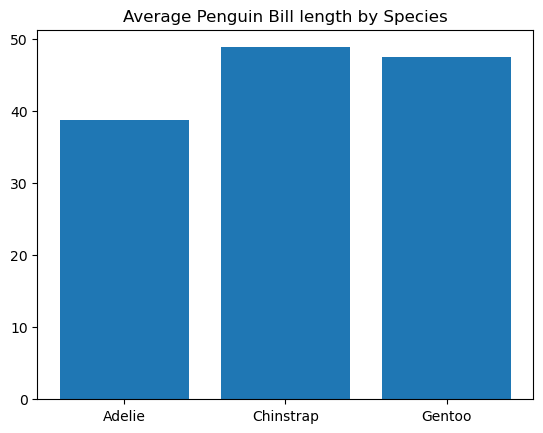

In [72]:
# Data preparation 
# code from Data Camps(https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python)
penguins_grouped = df[['species', 'bill_length_mm']].groupby('species').mean().reset_index()

# selecting 2 columns from the original penguins DataFrame: 'species' and 'bill_length_mm'. grouping the data,
# by the 'species' column and calc the mean bill length for each species. Then reset the index, to create new DataFrame,
# with 3 species and their corresponding average bill lengths.

# Creating a bar chart
plt.bar(penguins_grouped['species'], penguins_grouped['bill_length_mm'])
plt.title('Average Penguin Bill length by Species')
plt.show()

Adelie have the shortest Bill Length. Chinstrap have very slightly longer bills than Gentoo.

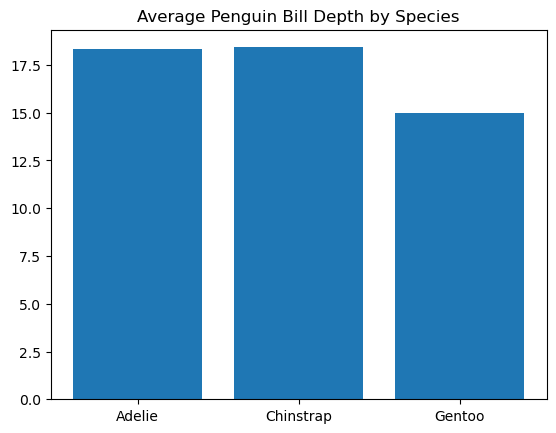

In [77]:
# repeating above except looking at bill depth.
penguins_grouped = df[['species', 'bill_depth_mm']].groupby('species').mean().reset_index()

# Creating a bar chart
plt.bar(penguins_grouped['species'], penguins_grouped['bill_depth_mm'])
plt.title('Average Penguin Bill Depth by Species')
plt.show()

The Gentoo have flatter bills than Adelie and Chinstrap. 

Text(0.5, 1.0, 'Palmer Penguin Data Set')

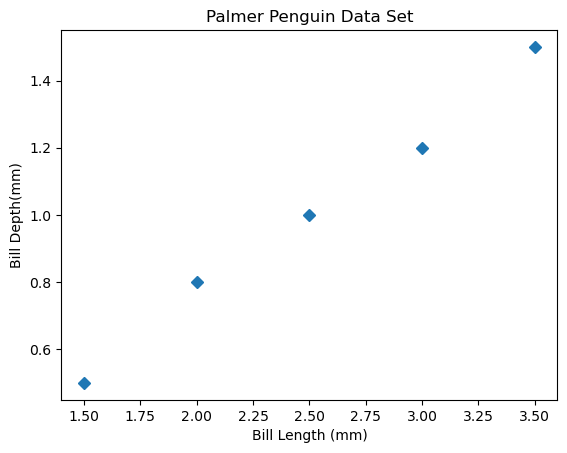

In [104]:
# closer inspection of the over all Bill
# Simple Scatter Plot. (using matplotlib)
plt.plot(bill_len, b_depth, "D")

# Axis Labels.
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth(mm)")

# Title
plt.title("Palmer Penguin Data Set") 




#### Add Best Fit Line
***

Correlation Coefficient: 0.9965


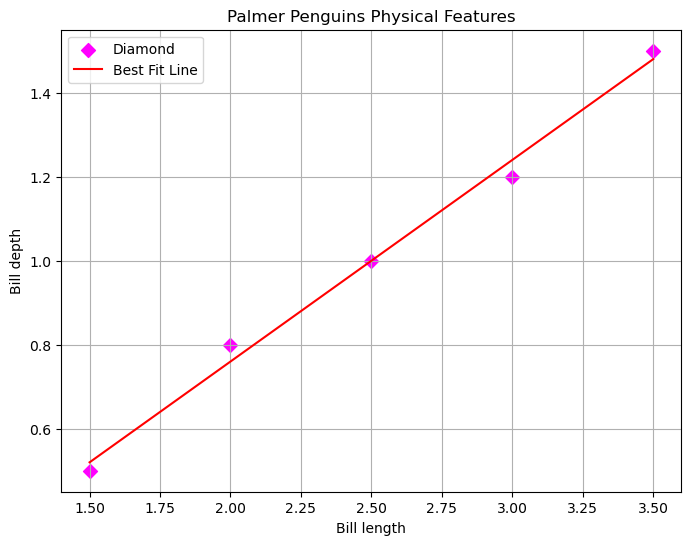

In [108]:
# import
from scipy.stats import linregress

bill_len = [1.5, 2.0, 2.5, 3.0, 3.5]
b_depth = [0.5, 0.8, 1.0, 1.2, 1.5]

# fitting the linear regression line / best fit line (the course example code wouldn't work so went in search of other option)
# linregress function from scipy.stats cal the b/fit for the relationship with b.length and b.depth.
# It makes the slope (regression coefficient), intercept, correlation coefficient, p-value, and standard error of the regression line.
#The b/fit line is shown as bill_depth = slope * bill_length + intercept.

slope, intercept, r_value, p_value, std_err = linregress(bill_len, b_depth)

# Calc the correlation coefficient using np.corrcoef(bill_len, b_depth)[0, 1].
#It measures the strength and direction of the linear relationship between the two variables.
# ( value close to 1 indicates a strong positive correlation.)
correlation_coefficient = np.corrcoef(bill_len, b_depth)[0, 1]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(bill_len, b_depth, s=50, c="magenta", marker='D', label='Diamond')
plt.plot(bill_len, slope * np.array(bill_len) + intercept, color='r', label='Best Fit Line')
plt.title("Palmer Penguins Physical Features") # title
plt.xlabel("Bill length") #label
plt.ylabel("Bill depth")    # label
plt.grid(True) # grid
plt.legend()    #legend

# show correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.4f}") # floating point number with 4 decimal places.

# Show the plot
plt.show()

Correlation Coefficient: 0.9965. There does seem to be close correlation as the number is close to 1. So i surmise that there is a close relationship between length and depth.

According to [Scribber](https://www.scribbr.com/statistics/correlation-coefficient/) "The Pearson’s product-moment correlation coefficient, also known as Pearson’s r, describes the linear relationship between two quantitative variables.

"These are the assumptions your data must meet if you want to use Pearson’s r:

Both variables are on an interval or ratio level of measurement
Data from both variables follow normal distributions. Your data have no outliers. 
Your data is from a random or representative sample
You expect a linear relationship between the two variables
The Pearson’s r is a parametric test, so it has high power. But it’s not a good measure of correlation if your variables have a nonlinear relationship, or if your data have outliers, skewed distributions, or come from categorical variables. If any of these assumptions are violated, you should consider a rank correlation measure."

***
###
End.